# DataChallenge

## Librairies

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

## Parameters, Hyperparameters, Seed

In [28]:
seed = 42
drop_humidity = False
feature_modif = True

## Data Collection

In [29]:
X = pd.read_csv("x_train_T9QMMVq.csv")
print(f"Dimension of the dataset: {X.shape}")
y = pd.read_csv("y_train_R0MqWmu.csv")
print(f"Dimension of the response vector: {y.shape}")
X_TEST = pd.read_csv("x_test_9F13O5s.csv", sep=",")
print(f"Dimension of the test dataset: {X_TEST.shape}")

Dimension of the dataset: (202933, 14)
Dimension of the response vector: (202933, 24)
Dimension of the test dataset: (134673, 14)


### Train Test split

Shuffle

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(142053, 14) (142053, 24)
(60880, 14) (60880, 24)


Times series

In [31]:
split = int(0.7 * len(X))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(142053, 14) (142053, 24)
(60880, 14) (60880, 24)


## Data Processing

In [32]:
print(X_train.head())

   ID  Humidity       M12       M13       M14       M15        M4        M5  \
0   0  0.098160 -0.175981 -0.086469 -0.041465 -0.021153  0.197597  0.054646   
1   1  0.000307 -0.066416  0.036071  0.032636 -0.000573  2.568494  1.883142   
2   2  0.000388  0.190943  0.187540  0.143680  0.092635 -0.147460 -0.021174   
3   3  0.761003 -0.151393 -0.083723 -0.048982 -0.018259  0.045380  0.102427   
4   4  0.107808  0.074818  0.042692  0.026169  0.019134 -0.056284 -0.011193   

         M6        M7         R        S1        S2        S3  
0 -0.009277  0.001855  1.007242  1.013007  1.000563  0.999397  
1  0.779251  0.262231  0.971428  0.996735  1.002226  1.013063  
2  0.040079  0.065790  1.302238  0.905275  0.953600  0.986347  
3  0.012915  0.004453  1.013741  1.004315  1.012301  1.009465  
4  0.010233  0.012205  0.998659  1.005154  1.000096  0.999553  


In [33]:
print(y_train.head())

   ID       c01  c02       c03       c04  c05  c06  c07  c08  c09  ...  c14  \
0   0  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1   1  0.000000  0.0  0.176471  0.176471  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2   2  0.128465  0.0  0.128465  0.128465  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3   3  0.000000  0.0  0.263736  0.263736  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4   4  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.0   

   c15  c16  c17       c18       c19  c20  c21       c22       c23  
0  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.000000  0.000000  
1  0.0  0.0  0.0  0.000000  0.176471  0.0  0.0  0.176471  0.000000  
2  0.0  0.0  0.0  0.128465  0.000000  0.0  0.0  0.128465  0.000000  
3  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.263736  0.263736  
4  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.000000  0.000000  

[5 rows x 24 columns]


### Study of Humidity

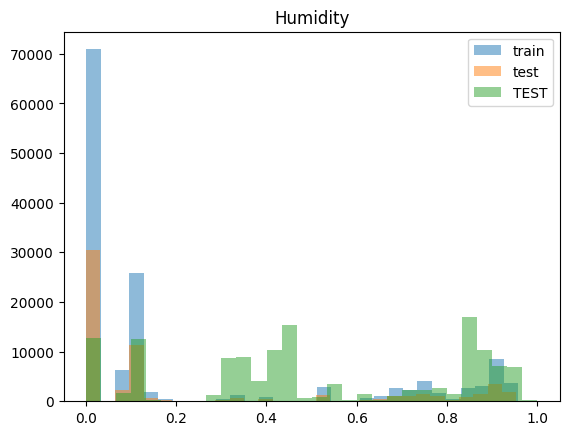

In [34]:
plt.hist(X_train["Humidity"], bins=30, alpha=0.5, label="train")
plt.hist(X_test["Humidity"], bins=30, alpha=0.5, label="test")
plt.hist(X_TEST["Humidity"], bins=30, alpha=0.5, label="TEST")
plt.title("Humidity")
plt.legend()
plt.show()

In [35]:
np.mean(X_train["Humidity"]), np.mean(X_test["Humidity"]), np.mean(X_TEST["Humidity"])

(np.float64(0.22526816450151718),
 np.float64(0.22578323684204102),
 np.float64(0.5121110517453115))

The humidity in X_TEST is much higher than in X. This skews our prediction on the TEST. To remove it, set drop_humidity = True.

### Feature engineering

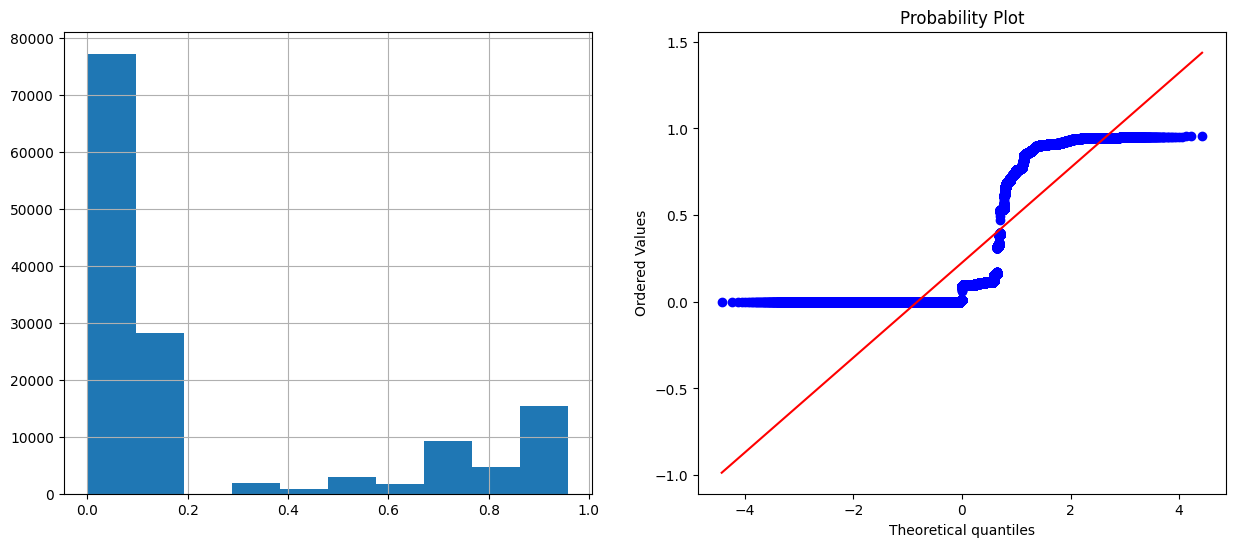

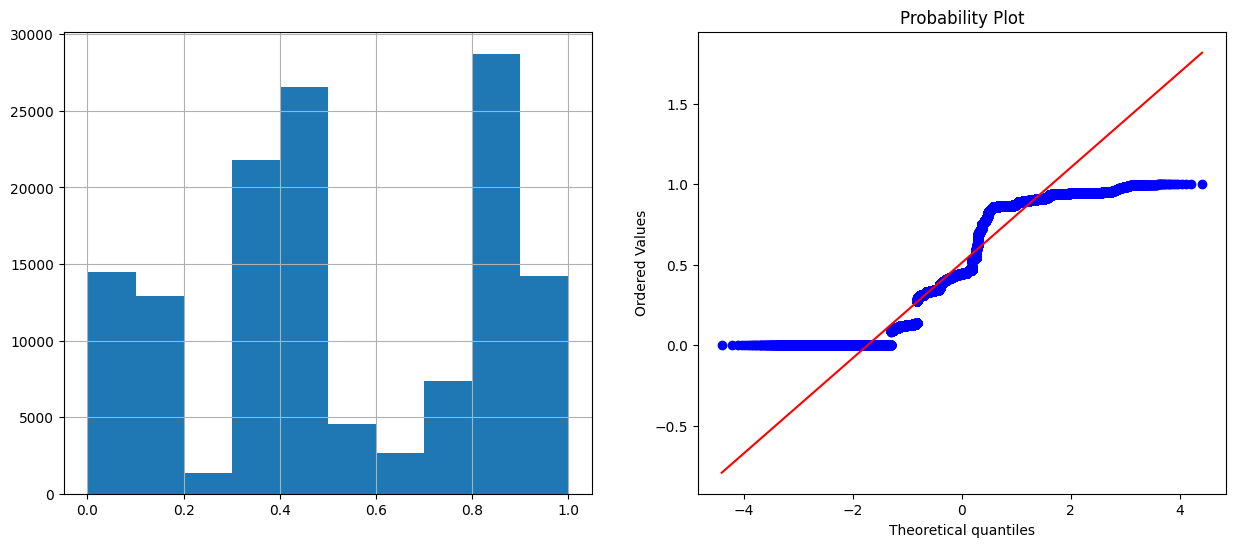

In [36]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    
diagnostic_plots(X_train, 'Humidity')
diagnostic_plots(X_TEST, 'Humidity')

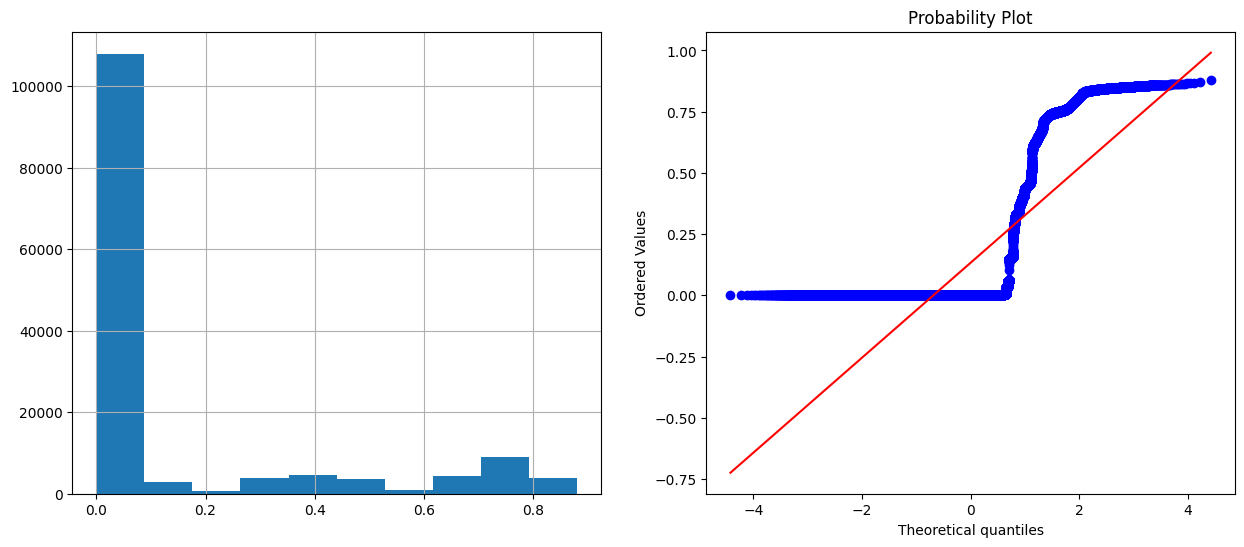

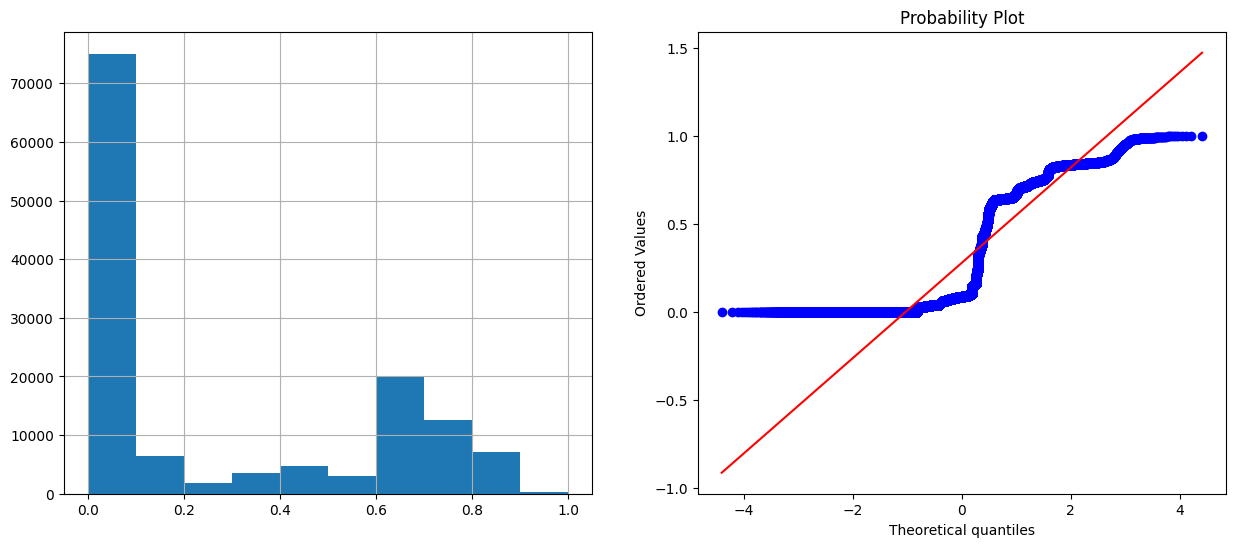

In [37]:
X_train_temp = X_train.copy()
X_TEST_temp = X_TEST.copy()

# transformation
X_train_temp['Humidity_pow3'] = (X_train_temp['Humidity'])**(3)
X_TEST_temp['Humidity_pow3'] = (X_TEST_temp['Humidity'])**(3)

diagnostic_plots(X_train_temp, 'Humidity_pow3')
diagnostic_plots(X_TEST_temp, 'Humidity_pow3')

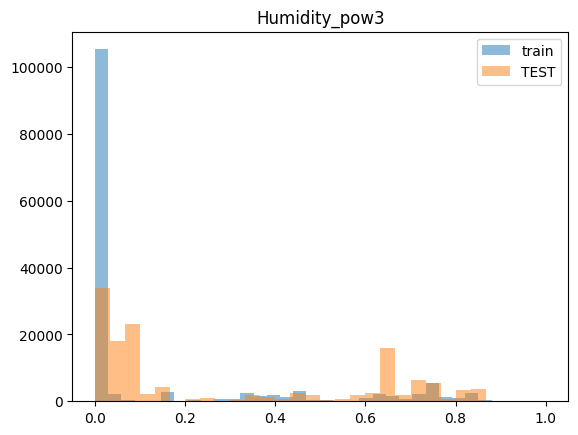

In [38]:
plt.hist(X_train_temp["Humidity_pow3"], bins=30, alpha=0.5, label="train")
plt.hist(X_TEST_temp["Humidity_pow3"], bins=30, alpha=0.5, label="TEST")
plt.title("Humidity_pow3")
plt.legend()
plt.show()

In [39]:
np.mean(X_train_temp["Humidity_pow3"]), np.mean(X_TEST_temp["Humidity_pow3"])

(np.float64(0.13329147647006018), np.float64(0.28089238516964177))

Maintenant la distribution de l'humidité semble plus proche entre le train et le TEST.

In [40]:
print(X.columns)

Index(['ID', 'Humidity', 'M12', 'M13', 'M14', 'M15', 'M4', 'M5', 'M6', 'M7',
       'R', 'S1', 'S2', 'S3'],
      dtype='object')


In [41]:
def feature_engineering(X):
    X = X.copy()

    # Grouping
    X["M_big"] = X["M12"] + X["M13"] + X["M14"] + X["M15"]
    X["M_small"] = X["M4"] + X["M5"] + X["M6"] + X["M7"]
    X["S"] = X["S1"] + X["S2"] + X["S3"]
    X["Total"] = X["Humidity"] + X["M_big"] + X["M_small"] + X["R"] + X["S"]

    # Log transformation
    X_shifted = X - X.min() + 1e-6
    for c in X.columns:
        X[f"log_{c}"] = np.log(X_shifted[c])

    # --- Définir les groupes ---
    M_big_cols = ["M12", "M13", "M14", "M15"]
    M_small_cols = ["M4", "M5", "M6", "M7"]
    S_cols = ["S1", "S2", "S3"]

    # --- Interactions à l'intérieur de chaque groupe ---
    def add_group_interactions(df, cols, group_name):
        for c1, c2 in combinations(cols, 2):
            df[f"{group_name}_{c1}_x_{c2}"] = df[c1] * df[c2]
        return df

    X = add_group_interactions(X, M_big_cols, "Mbig")
    X = add_group_interactions(X, M_small_cols, "Msmall")
    X = add_group_interactions(X, S_cols, "Sgroup")

    # --- Interactions entre groupes ---
    X["Humidity_x_R"] = X["Humidity"] * X["R"]
    X["Humidity_x_M12"] = X["Humidity"] * X["M12"]
    X["R_x_S1"] = X["R"] * X["S1"]

    # Power transformation 
    X['Humidity_pow3'] = X['Humidity'] ** 3

    return X

### Data processing function

In [42]:
def data_processing(X, y=None):
    X = X.copy()
    X.set_index("ID", inplace=True)
    if drop_humidity:
        X.drop("Humidity", axis=1, inplace=True)
    if feature_modif:
        X = feature_engineering(X)

    if y is not None:
        y = y.copy()
        y.set_index("ID", inplace=True)
            
        return X, y
    else:
        return X

In [43]:
X_train, y_train = data_processing(X_train, y_train)
X_test, y_test = data_processing(X_test, y_test)
X_TEST = data_processing(X_TEST, None)

In [44]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_TEST.shape)

(142053, 53) (142053, 23)
(60880, 53) (60880, 23)
(134673, 53)


## Model

Random Forest

In [45]:
rf = RandomForestRegressor(
        n_estimators=10,
        max_depth=8,
        min_samples_split=0.01,
        min_samples_leaf=30,
        random_state=seed
    )

# Entraînement
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,8
,min_samples_split,0.01
,min_samples_leaf,30
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
# Prédictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

y_train_pred.shape, y_test_pred.shape

((142053, 23), (60880, 23))

In [47]:
y_train_pred_clipped = np.clip(y_train_pred, 0, 1)
y_test_pred_clipped = np.clip(y_test_pred, 0, 1)

rmse_train = root_mean_squared_error(y_train, y_train_pred_clipped)
rmse_test = root_mean_squared_error(y_test, y_test_pred_clipped)


print(f"rmse train: {rmse_train}")
print(f"rmse test: {rmse_test}")

# rmse train: 0.10208407509348237
# rmse test: 0.10237637697308155

rmse train: 0.09698661042625678
rmse test: 0.09793593017741249


## Generating Submission File

### Training of the model on all the data

In [48]:
X, y = data_processing(X, y)
print(X.shape, y.shape)
rf.fit(X, y)

(202933, 53) (202933, 23)


,n_estimators,10
,criterion,'squared_error'
,max_depth,8
,min_samples_split,0.01
,min_samples_leaf,30
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Prediction of the model

In [49]:
y_TEST_pred = rf.predict(X_TEST)
y_TEST_pred_clipped = np.clip(y_TEST_pred, 0, 1)
m, n = y_TEST_pred_clipped.shape
print(m,n)

134673 23


### Creating submission file

In [50]:
columns = ["ID"] + list(y_test.columns)
print(columns)
print(len(columns))
C0 = np.array([i + 202933 for i in range(0,m)])
C0 = C0.reshape(-1, 1)
y_TEST_pred_new = np.hstack((C0, y_TEST_pred_clipped))
print(y_TEST_pred_new.shape)

['ID', 'c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23']
24
(134673, 24)


In [51]:
submission = pd.DataFrame(y_TEST_pred_new, columns=columns)
submission["ID"] = submission["ID"].astype(int)

submission.to_csv('submission.csv', index=False, sep=',')
print(submission.shape)
print(submission.head())

(134673, 24)
       ID       c01       c02       c03       c04       c05       c06  \
0  202933  0.096460  0.005099  0.229070  0.229070  0.000376  0.000376   
1  202934  0.069741  0.005236  0.459890  0.459890  0.000546  0.000546   
2  202935  0.000135  0.000000  0.514148  0.514148  0.513339  0.513339   
3  202936  0.097602  0.013741  0.204628  0.204628  0.067387  0.067387   
4  202937  0.122566  0.055159  0.182352  0.182352  0.001738  0.001738   

        c07       c08       c09  ...       c14  c15       c16       c17  \
0  0.005099  0.000008  0.003319  ...  0.039153  0.0  0.001690  0.006549   
1  0.005236  0.001085  0.029517  ...  0.061878  0.0  0.002495  0.018322   
2  0.000000  0.000000  0.000000  ...  0.000135  0.0  0.000000  0.000000   
3  0.013741  0.000000  0.000000  ...  0.054908  0.0  0.000000  0.000683   
4  0.055159  0.000004  0.000002  ...  0.053712  0.0  0.001077  0.000102   

        c18       c19       c20       c21       c22       c23  
0  0.000188  0.030591  0.005099  

In [52]:
df1 = pd.read_csv("submission_benchmark.csv")
df2 = pd.read_csv("submission.csv")

# Vérif globale
if df1.equals(df2):
    print("✅ Les fichiers sont identiques.")
else:
    print("❌ Les fichiers diffèrent.")

    # Détails
    diff = df1.compare(df2)
    print("\nDifférences détectées :")
    print(diff.head())

    # Écart moyen sur les colonnes numériques
    num_cols = df1.select_dtypes(include=[np.number]).columns
    print("\nÉcart moyen absolu :")
    print((df1[num_cols] - df2[num_cols]).abs().mean())

❌ Les fichiers diffèrent.

Différences détectées :
        c01                 c02                 c03                 c04  \
       self     other      self     other      self     other      self   
0  0.034743  0.096460  0.007517  0.005099  0.058500  0.229070  0.058500   
1  0.120045  0.069741  0.003234  0.005236  0.371503  0.459890  0.371503   
2  0.002018  0.000135  0.020427  0.000000  0.458733  0.514148  0.458733   
3  0.099553  0.097602  0.015103  0.013741  0.209191  0.204628  0.209191   
4  0.183000  0.122566  0.032698  0.055159  0.224145  0.182352  0.224145   

                  c05            ...       c19                 c20            \
      other      self     other  ...      self     other      self     other   
0  0.229070  0.000007  0.000376  ...  0.002193  0.030591  0.007517  0.005099   
1  0.459890  0.000000  0.000546  ...  0.025217  0.028833  0.003234  0.005236   
2  0.514148  0.430761  0.513339  ...       NaN       NaN  0.020427  0.000000   
3  0.204628  0.055341  